In [238]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox


### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [317]:
#FILE 
original_customer_df= pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")
original_customer_df


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [240]:
#Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
original_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [241]:
# one dataframe for numerical, other for categorical

#LONG WAY
#numeral_customer= original_customer_df[["customer_lifetime_value","income","monthly_premium_auto","months_since_policy_inception","number_of_open_complaints","number_of_policies","months_since_last_claim","total_claim_amount"]].copy()
#categoricals_customer= original_customer_df[["region","response","coverage","education","effective_to_date","month","employment_status","gender","location_code","marital_status","policy_type","policy","renew_offer_type","sales_channel","vehicle_class","vehicle_size"]]

#SHORT WAY
numerical_df= original_customer_df.select_dtypes(include='int64')
categoricals_df= original_customer_df.select_dtypes(include='object')

#numeral_customer
categoricals_df


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


-Now we will try to check the normality of the numerical variables visually
-Use seaborn library to construct distribution plots for the numerical variables
-Use Matplotlib to construct histograms. Done
-Do the distributions for different numerical variables look like a normal distribution? They dont look like a normal distribution

C:\Users\Stephan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Stephan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

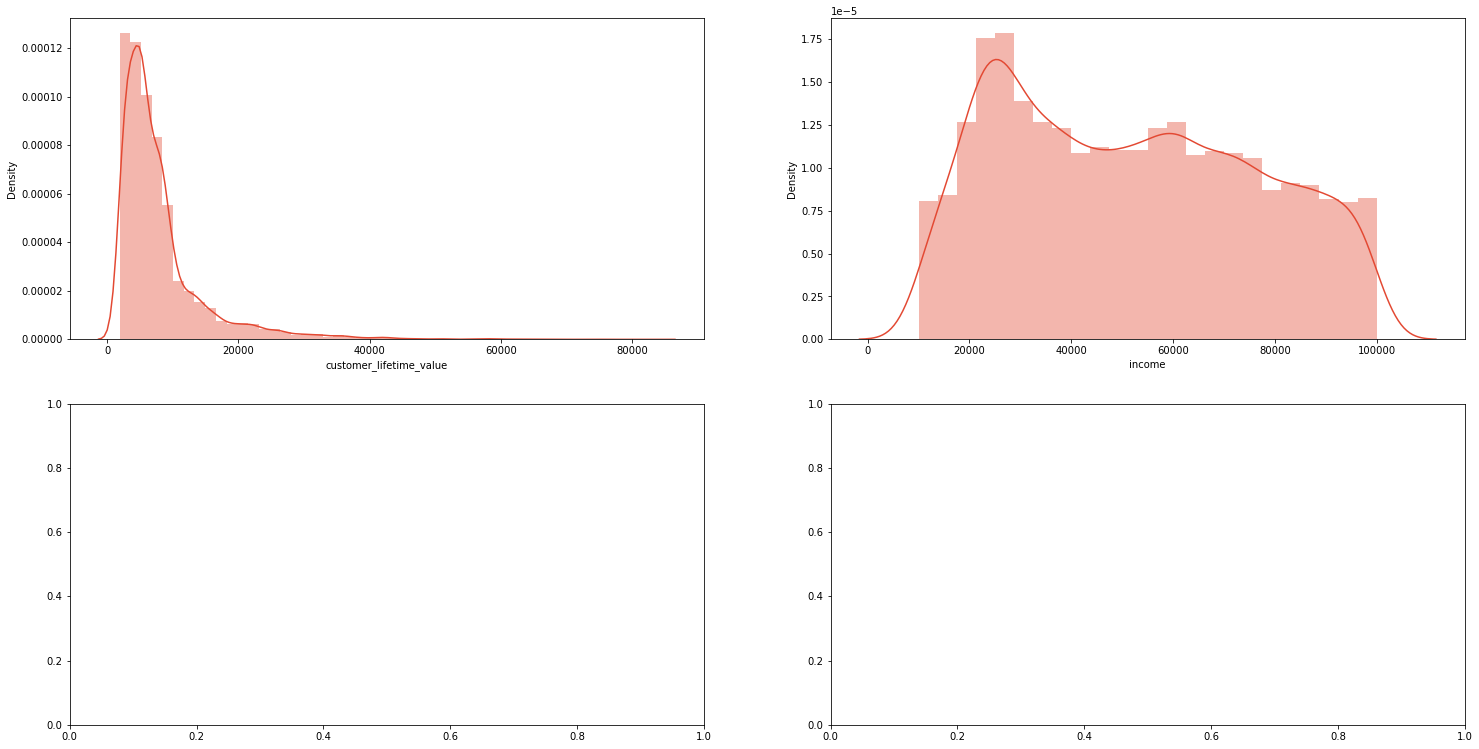

In [353]:
#Use seaborn library to construct distribution plots for the numerical variables

fig1,axe1=plt.subplots(2,2,figsize=(25,13))
sns.distplot(numerical_df.customer_lifetime_value, ax=axe1[0,0])
sns.distplot(numerical_df.income, ax=axe1[0,1])
#sns.distplot(numerical_df.monthly_premium_auto, ax=axe1[0,2])
#sns.distplot(numerical_df.months_since_last_claim, ax=axe1 [0,3])
#sns.distplot(numerical_df.months_since_policy_inception, ax=axe1[1,0])
#sns.distplot(numerical_df.number_of_open_complaints, ax=axe1 [1,1])
#sns.distplot(numerical_df.number_of_policies, ax=axe1 [1,2])
#sns.distplot(numerical_df.total_claim_amount, ax=axe1 [1,3])

C:\Users\Stephan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Stephan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

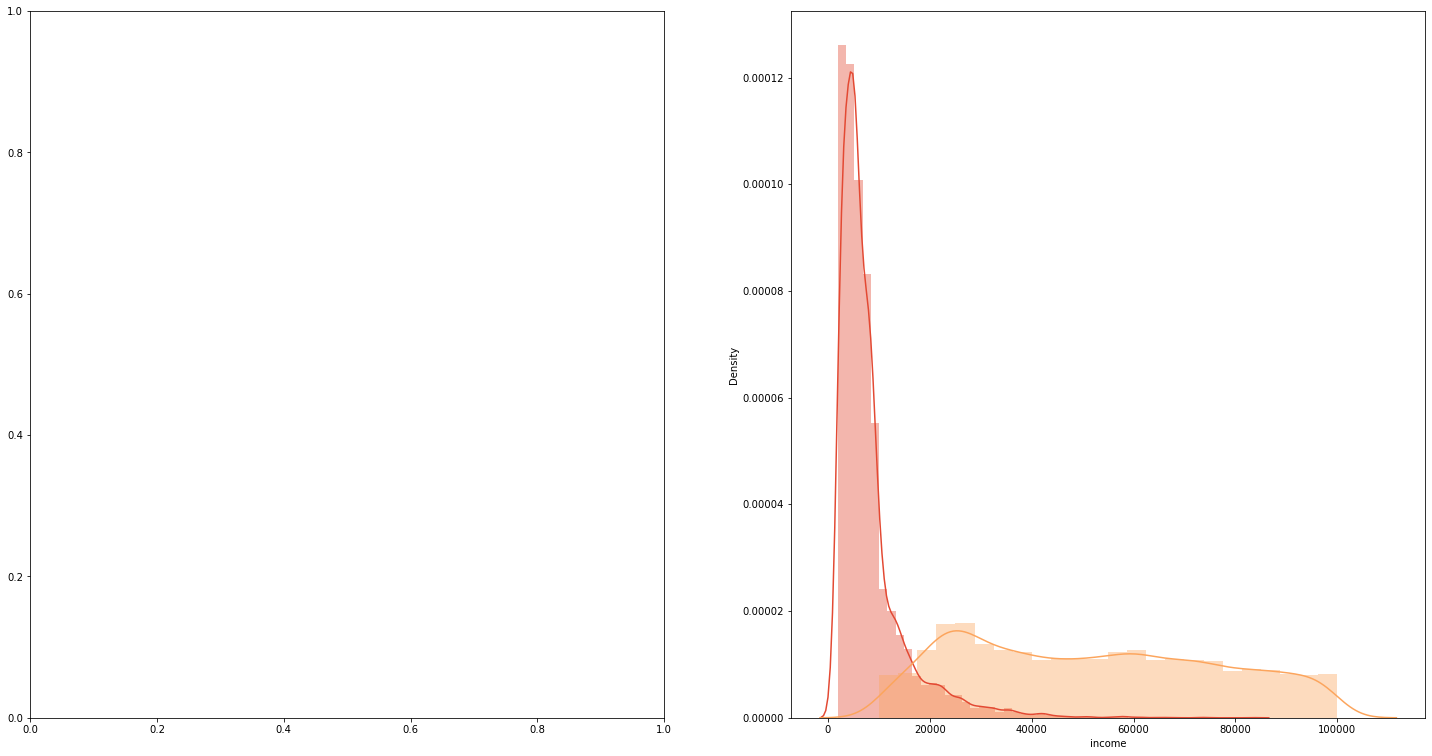

In [243]:

fig1,axe1=plt.subplots(1,2,figsize=(25,13))
sns.distplot(numerical_df.customer_lifetime_value)
sns.distplot(numerical_df.income)


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

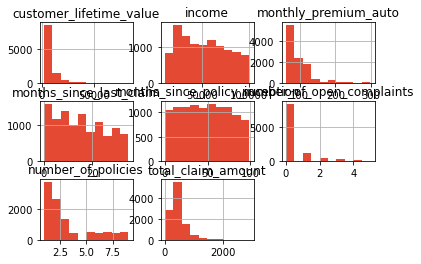

In [244]:
numerical_df.hist() #-Use Matplotlib to construct histograms. 

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>]],
      dtype=object)

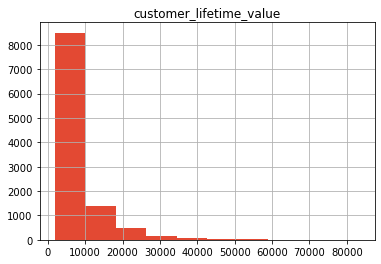

In [245]:
numerical_df.hist("customer_lifetime_value")  # 1 column

-For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.
-Plot the Correlation Heatmap.
-(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [246]:
numerical_df.corr()  #GOOD

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='total_claim_amount'>

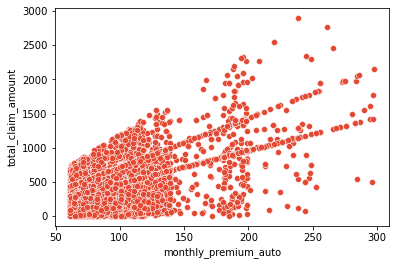

In [247]:
sns.scatterplot(x=numerical_df.monthly_premium_auto,y=numerical_df.total_claim_amount) #-For the numerical variables, check the multicollinearity between the input features. multicollinearity does not include the target feature.

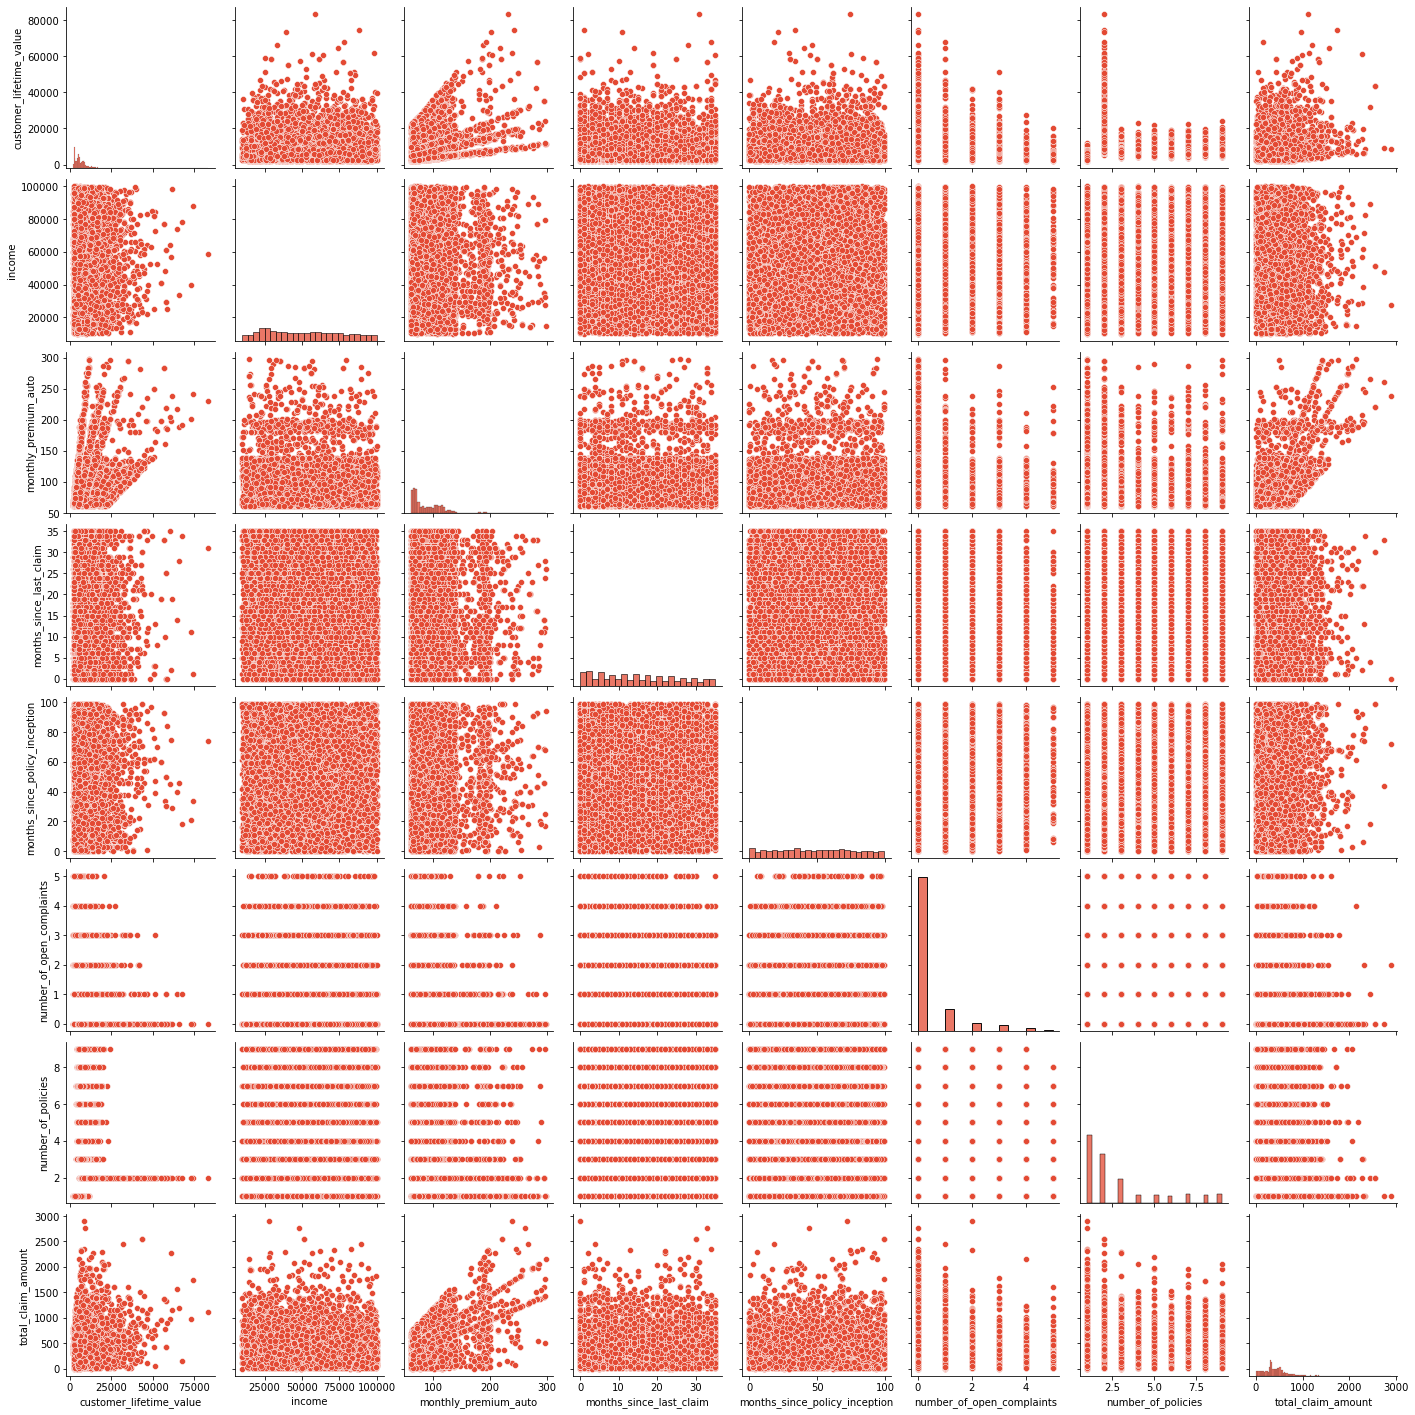

In [248]:
sns.pairplot(numerical_df)

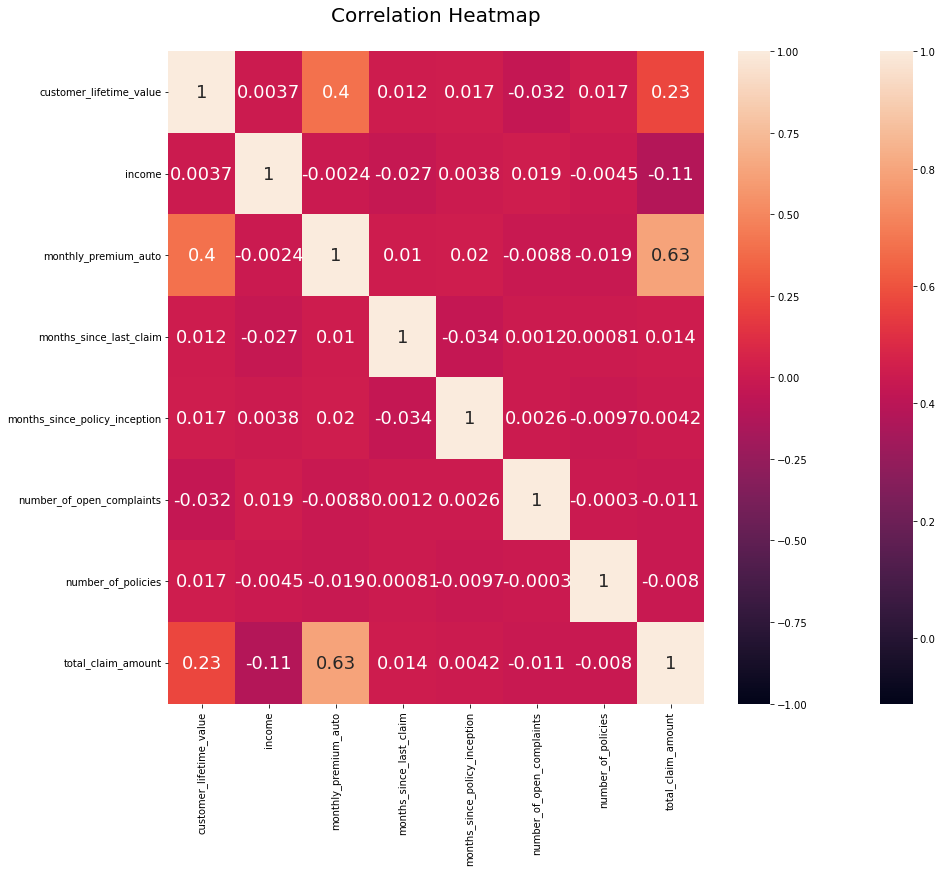

In [249]:
###-Plot the Correlation Heatmap.
plt.figure(figsize=(15,12)) ### FIGURE SIZE

heatmap=sns.heatmap(numerical_df.corr())
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=30)

heatmap = sns.heatmap(numerical_df.corr(),annot_kws={"size":18}, vmin=-1, vmax=1, annot= True) ## annot para la letra, kw=tamano y True para existir o no

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight') ##### SAVE IMAGE

In [250]:
#(Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [251]:
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it a readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [258]:
#numerical_df
categoricals_df["response"].unique()


array(['no', 'yes'], dtype=object)

<AxesSubplot:>

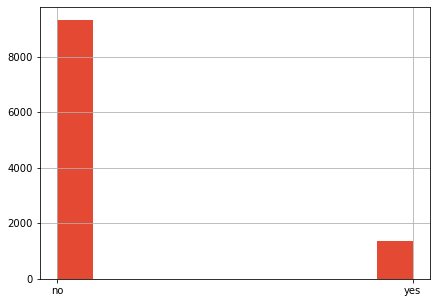

In [257]:
categoricals_df["response"].hist(figsize=(7,5))

In [254]:
response = categoricals_df['response'].value_counts()
response

no     9316
yes    1373
Name: response, dtype: int64

Text(0, 0.5, '#answers')

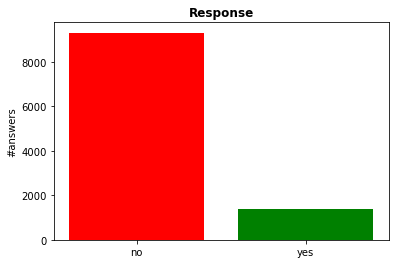

In [255]:
# create figure and axes
plt.bar(response.index, response, color=('red','green')) # response= column name
# set title

plt.title('Response', fontweight='bold')
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.ylabel("#answers")

In [259]:
#https://www.pythoncharts.com/python/stacked-bar-charts/ dos variables en una


##ORIGINAL FORMULA
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
x.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center')


##############################
from matplotlib import pyplot as plt

#for i in categoricals_df["response"]:
    #if i == "yes":
        #return [1]
   # else: 
        #return [0]
        
x=categoricals_df["response"]
def grafica (x): 
        if x in ["yes"]:
            return 1
        else:
            return 0
x =grafica (x)
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
x.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center')

TypeError: no numeric data to plot

In [260]:
#Show a plot of the response by the sales channel.
# type of answer by sales_channel
categoricals_df["sales_channel"].unique()

array(['agent', 'call center', 'branch', 'web'], dtype=object)

In [261]:
answer = categoricals_df['response'].value_counts()
answer

no     9316
yes    1373
Name: response, dtype: int64

In [262]:
sales=categoricals_df["sales_channel"].value_counts()
sales

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<BarContainer object of 4 artists>

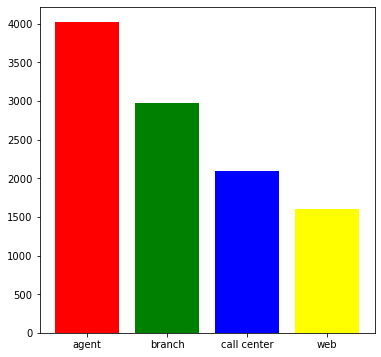

In [263]:
fig3, ax3 = plt.subplots(figsize = (6,6))
ax3.bar(sales.index,sales,color=("red","green","blue","yellow"))

<BarContainer object of 4 artists>

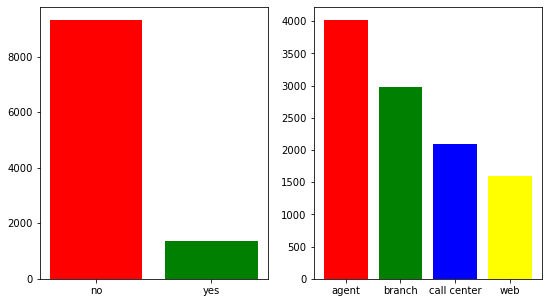

In [278]:
# create figure and axes
fig3, axes3 = plt.subplots(1,2,figsize = (9,5))

# plot the bar chart
axes3[0].bar(answer.index, answer, color=('red','green', 'blue'))
axes3[1].bar(sales.index, sales, color=('red','green', 'blue',"yellow"))

In [367]:

def ranking (x):
    if x.startswith("y"):
        return 1
    else:
        return 0
    

original_customer_df["count of response"]=original_customer_df["response"].apply(ranking)
original_customer_df["count of response"].value_counts()

0    9316
1    1373
Name: count of response, dtype: int64

<AxesSubplot:>

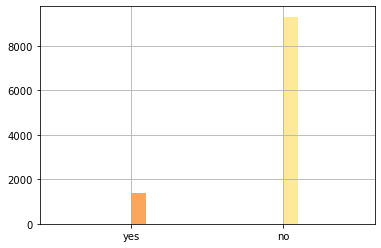

In [382]:
# separar si y nos en graficas distintas para luehgo sobreponerlas la una a la otra, como en el primerer grafico de arriba de todo
def ranking (x):
    if x.startswith("y"):
        return "yes"
    else:
        return
    

grafica_yes = original_customer_df["count of response"]=original_customer_df["response"].apply(ranking)
grafica_yes.dropna(inplace= True)

grafica_yes.hist()

def ranking (x):
    if x.startswith("n"):
        return "no"
    else:
        return
    
grafica_no = original_customer_df["count of response"]=original_customer_df["response"].apply(ranking)
grafica_no.dropna(inplace= True)


grafica_yes.hist()
grafica_no.hist()

<AxesSubplot:>

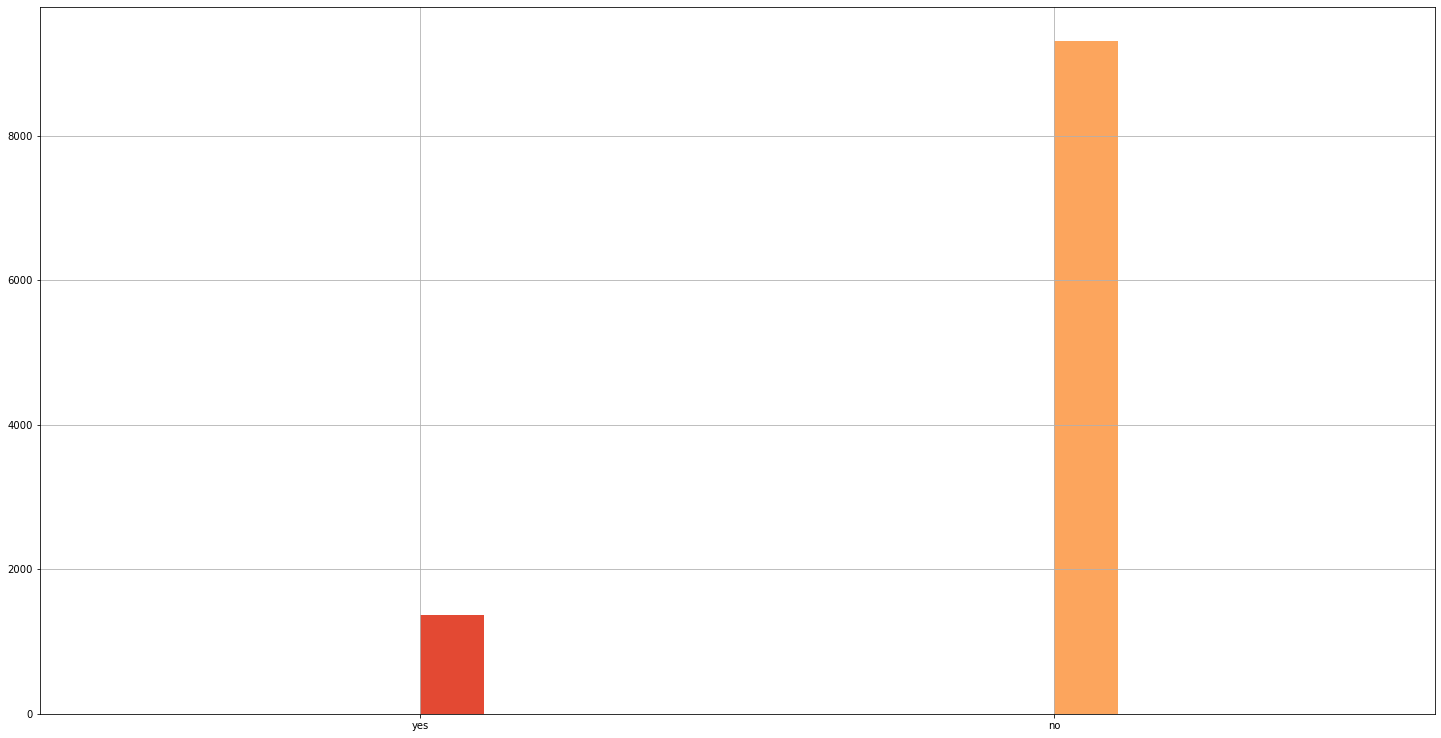

In [385]:
fig1,axe1=plt.subplots(1,1,figsize=(25,13))   #xq no se unen los graficos como en la primeras grafias?
grafica_yes.hist()
grafica_no.hist()

In [275]:
answer_by_group = original_customer_df.groupby(["sales_channel",'response'])["count of response"].count().reset_index()
answer_by_group

,sales_channel,response,count of response
0,agent,no,3340
1,agent,yes,679
2,branch,no,2665
3,branch,yes,310
4,call center,no,1890
5,call center,yes,209
6,web,no,1421
7,web,yes,175


In [327]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}

<AxesSubplot:title={'center':'Response by the sales channel'}, xlabel='sales_channel', ylabel='count of response'>

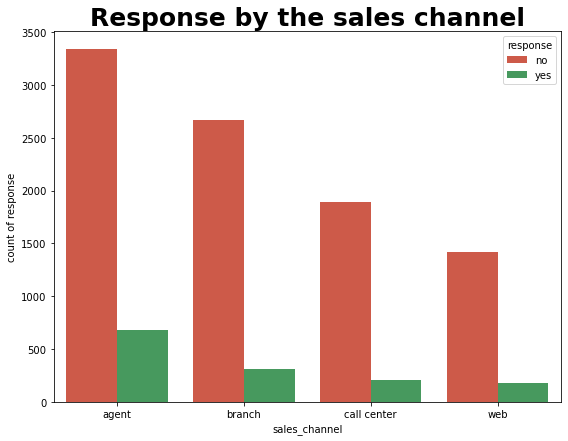

In [277]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Response by the sales channel', size='25', fontweight='bold')
sns.barplot(x = answer_by_group['sales_channel'],y = answer_by_group['count of response'], hue = answer_by_group['response'], palette=palette_alive)



# Show a plot of the response by the total claim amount.

In [284]:
numerical_df.keys()

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [288]:
numerical_df.total_claim_amount

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

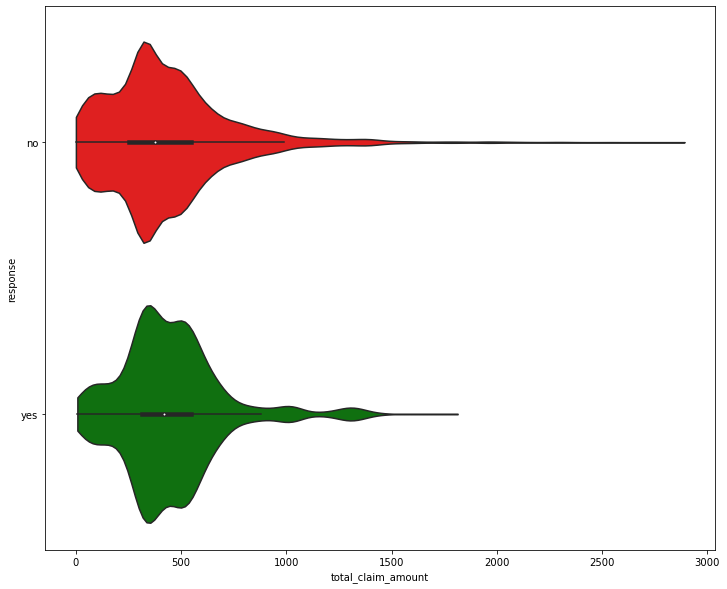

In [355]:
plt.figure(figsize=(12,10))
sns.violinplot(data=original_customer_df, x="total_claim_amount", y="response", cut=0,palette=['r','g','b','m'])


<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

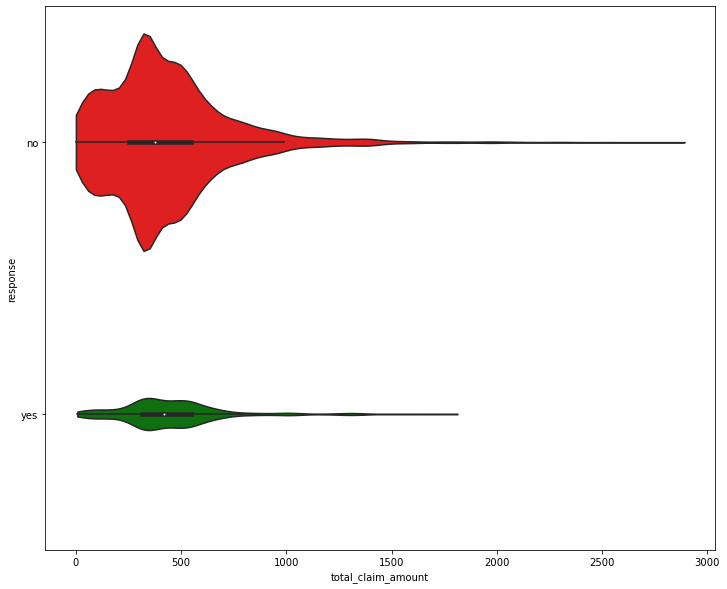

In [354]:
plt.figure(figsize=(12,10)) #scale count ON
sns.violinplot(data=original_customer_df, x="total_claim_amount", y="response", cut=0,palette=['r','g','b','m'],scale="count")

# Show a plot of the response by income.

In [314]:
numerical_df.income.value_counts()

95697    13
27972    10
60920    10
48567     9
35625     9
         ..
71626     1
36660     1
87050     1
63833     1
68942     1
Name: income, Length: 8210, dtype: int64

In [390]:
original_customer_df.income.describe()

count    10689.000000
mean     51750.243989
std      24778.053035
min      10037.000000
25%      29335.000000
50%      50398.000000
75%      72131.000000
max      99981.000000
Name: income, dtype: float64

In [ ]:
original_customer_df.income.describe()

In [438]:
original_customer_df['rounded_claim_amount'] = original_customer_df['total_claim_amount'].apply(round, ndigits = -2)
original_customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,count of response,rounded_claim_amount
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize,no,300
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize,no,700
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,2,personal auto,personal l3,offer3,call center,480,suv,medsize,no,500
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize,None,500
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize,no,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize,no,1200
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize,no,300
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize,no,400
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,6,personal auto,personal l1,offer1,branch,618,suv,medsize,no,600


<AxesSubplot:xlabel='rounded_claim_amount', ylabel='count'>

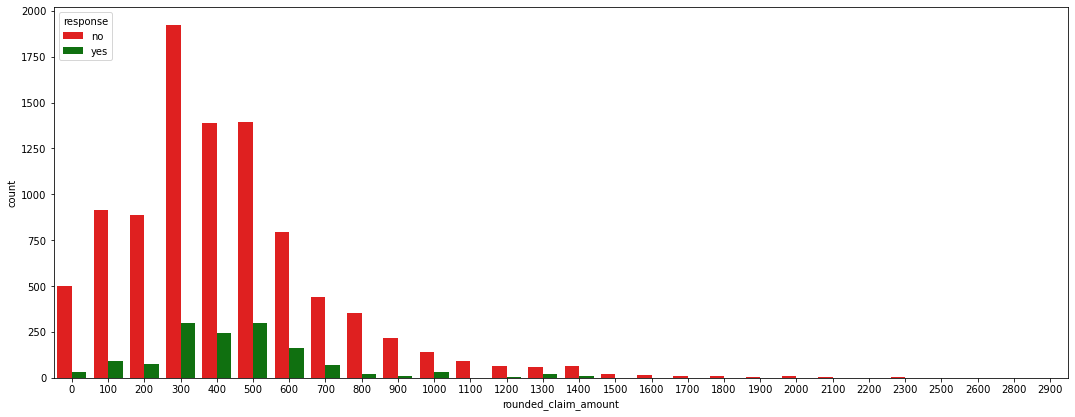

In [439]:
plt.figure(figsize=(40,15))
plt.subplot(2,2,1)
sns.countplot(x ='rounded_claim_amount', hue = 'response', data = original_customer_df,palette=['r','g','b','m'])